### ............................................................ BIG BASKET DATA ANALYSIS .........................................................................

### Big Basket, India's largest online grocery store, offers a wide range of products across various categories, including fresh fruits and vegetables, dairy products, personal care items, household supplies, and more. Analyzing Big Basket's data can provide insights into product performance, customer behavior, and market trends.

### ![Bigbasket-image-01-scaled.jpg](attachment:Bigbasket-image-01-scaled.jpg)

### The motives behind doing Big Basket Product Analysis are :
### *Product Performance Analysis
### *Brand Analysis
### *Customer Feedback Analysis
### *Price Analysis  

### ![bb2.jpg](attachment:bb2.jpg)

### Importing required libraries is python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

### Reading the data file (csv file ) in python using pandas library

In [ ]:
super_data = pd.read_csv("/BigBasket Products.csv")
super_data.head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


### Analysing the super_data by describe, info command and checking null values

In [ ]:
super_data.shape

(27555, 10)

In [ ]:
super_data.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [ ]:
super_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
super_data.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

### Performing Outlier treatment in rating column - Using IQR Method

In [ ]:
Q1 = super_data["rating"].quantile(0.25)
Q3 = super_data["rating"].quantile(0.75)

IQR = Q3-Q1

Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR


Q1, Q3, IQR, Lower_limit, Upper_limit


(3.7, 4.3, 0.5999999999999996, 2.8000000000000007, 5.199999999999999)

In [ ]:
outliers = super_data[(super_data.rating < Lower_limit) | (super_data.rating > Upper_limit)]
outliers.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
11,12,Butter Cookies Gold Collection,Gourmet & World Food,Chocolates & Biscuits,Sapphire,600.00,600.0,"Luxury Chocolates, Gifts",2.2,Enjoy a tin full of delicious butter cookies m...
29,30,Lip Butter - Rose,Beauty & Hygiene,Skin Care,Organic Harvest,169.15,199.0,Lip Care,1.5,Reload the dry and chapped lips with Organic L...
43,44,Storage/Lunch Steel Container with PP Lid - Red,"Kitchen, Garden & Pets",Steel Utensils,Classic Essentials,109.00,299.0,Steel Lunch Boxes,2.6,Add a dash of colour to your kitchen with thes...
64,65,Aqua Halo Rejuvenating Conditioner,Beauty & Hygiene,Hair Care,Azafran,168.75,225.0,Shampoo & Conditioner,1.0,This Aqua Halo Rejuvenating Conditioner is an ...


In [ ]:
outliers.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27415,27416,Shafair,Beauty & Hygiene,Skin Care,Shahnaz Husain,700.0,700.0,Face Care,2.0,Shahnaz Husains Shafair plus is a highly exclu...
27493,27494,De-Tan Peel Off Mask,Beauty & Hygiene,Men's Grooming,Beardo,359.1,399.0,Face & Body,2.8,"We fight pollution and sun daily, while our re..."
27498,27499,"Juicer - Fruit & Vegetable, Light Green","Kitchen, Garden & Pets",Kitchen Accessories,Ganesh,1071.0,1071.0,Kitchen Tools & Other Accessories,2.0,This juicer comes in various attractive colour...
27503,27504,Pedal Plastic Dustbin / Garbage Bin - Assorted,Cleaning & Household,Bins & Bathroom Ware,JOYO,169.0,246.0,Dustbins,2.7,This pedal dustbin is versatile and has a styl...
27518,27519,Gluten-Free Vegetable Millet Khichdi Mix,Gourmet & World Food,Cooking & Baking Needs,Graminway,350.0,350.0,Flours & Pre-Mixes,1.0,Graminway Little Millet Khichdi Mix makes your...


### Total number of Outliers present in the rating column

In [ ]:
outliers.shape

(1312, 10)

### Null value treatment - "rating column" - filling null values by mean value
### In other columns there are less number of null values present, so we directly drop those null values

In [ ]:
super_data["rating"].median()

3.943409583179249

In [ ]:
super_data["rating"] = super_data["rating"].fillna(3.9)

In [ ]:
super_data.dropna(inplace=True)

In [ ]:
super_data.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [ ]:
super_data.shape

(27439, 10)

### EDA - Exploratory Data Analysis of brand BigBasket data

In [ ]:
super_data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### Cleaning Product Column

In [ ]:
product_value =super_data["product"].value_counts()
product_value

product
Turmeric Powder/Arisina Pudi               26
Extra Virgin Olive Oil                     15
Cow Ghee/Tuppa                             13
Colorsilk Hair Colour With Keratin         12
Soft Drink                                 12
                                           ..
Jamun Vati                                  1
Drops - Milk Chocolate                      1
Cooling Mint Body Wash                      1
Snacks - Cheese Balls, Cheese Flavoured     1
Green Tea - Pure Original                   1
Name: count, Length: 23449, dtype: int64

In [ ]:
product_lessthan_5 = product_value[product_value<5]
product_lessthan_5

product
Tea Tree Essential Oil                     4
Peanut Butter                              4
Cow Ghee/Tuppa - A2 Badri                  4
Original Soap                              4
Good Day Butter Cookies                    4
                                          ..
Jamun Vati                                 1
Drops - Milk Chocolate                     1
Cooling Mint Body Wash                     1
Snacks - Cheese Balls, Cheese Flavoured    1
Green Tea - Pure Original                  1
Name: count, Length: 23346, dtype: int64

In [ ]:
def handle_product(value):
    if (value in product_lessthan_5):
        return "Others"
    else:
        return value

super_data["product"] = super_data["product"].apply(handle_product)
p=super_data["product"].value_counts()

### Category Column

In [ ]:
category_value =super_data["category"].value_counts()
category_value

category
Beauty & Hygiene            7856
Gourmet & World Food        4647
Kitchen, Garden & Pets      3562
Snacks & Branded Foods      2813
Cleaning & Household        2665
Foodgrains, Oil & Masala    2655
Beverages                    881
Bakery, Cakes & Dairy        851
Baby Care                    609
Fruits & Vegetables          556
Eggs, Meat & Fish            344
Name: count, dtype: int64

### Cleaning Sub-Category Column

In [ ]:
sub_category_value =super_data["sub_category"].value_counts()
sub_category_value

sub_category
Skin Care                   2291
Health & Medicine           1133
Hair Care                   1027
Storage & Accessories       1013
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64

In [ ]:
sub_category_lessthan_500 = sub_category_value[sub_category_value<500]
sub_category_lessthan_500

sub_category
All Purpose Cleaners        473
Stationery                  410
Bins & Bathroom Ware        392
Dairy                       385
Cookware & Non Stick        354
                           ... 
Mutton & Lamb                20
Water                        17
Flower Bouquets, Bunches      8
Pork & Other Meats            5
Marinades                     1
Name: count, Length: 73, dtype: int64

In [ ]:
def handle_sub_cat(value):
    if (value in sub_category_lessthan_500):
        return "Others"
    else:
        return value

super_data["sub_category"] = super_data["sub_category"].apply(handle_sub_cat)
sub_cat =super_data["sub_category"].value_counts()

### Cleaning Brand Column

In [ ]:
brand_value =super_data["brand"].value_counts()
brand_value

brand
Fresho              637
bb Royal            539
BB Home             427
DP                  250
Fresho Signature    171
                   ... 
Unity                 1
Mix Box               1
Airific               1
Aeres                 1
Baron De Bercy        1
Name: count, Length: 2309, dtype: int64

In [ ]:
brand_lessthan_100 = brand_value[brand_value< 100]
brand_lessthan_100

brand
True Elements     99
Mamaearth         97
HappyChef         96
Graminway         96
Dettol            95
                  ..
Unity              1
Mix Box            1
Airific            1
Aeres              1
Baron De Bercy     1
Name: count, Length: 2284, dtype: int64

In [ ]:
def handlebrand(value):
    if (value in brand_lessthan_100):
        return "Others"
    else:
        return value

super_data["brand"] = super_data["brand"].apply(handlebrand)
b= super_data["brand"].value_counts()

### Cleaning Type Column

In [ ]:
type_value =super_data["type"].value_counts()
type_value

type
Face Care                1506
Ayurveda                  538
Men's Deodorants          500
Shampoo & Conditioner     461
Glassware                 415
                         ... 
Fresh & Frozen Pork         1
Roses                       1
Prawns & Shrimps            1
Specialty                   1
Turkey & Duck               1
Name: count, Length: 426, dtype: int64

In [ ]:
type_lessthan_200 = type_value[type_value< 200]
type_lessthan_200

type
Cups, Mugs & Tumblers       198
Face & Body                 198
Chips & Corn Snacks         186
Chocolates                  177
Cookies, Biscotti, Wafer    174
                           ... 
Fresh & Frozen Pork           1
Roses                         1
Prawns & Shrimps              1
Specialty                     1
Turkey & Duck                 1
Name: count, Length: 400, dtype: int64

In [ ]:
def handle_type(value):
    if (value in type_lessthan_200):
        return "Others"
    else:
        return value

super_data["type"] = super_data["type"].apply(handle_type)
T = super_data["type"].value_counts()

### Checking Values in Sales Price and Market Price columns

In [ ]:
super_data.sale_price.unique()

array([ 220.  ,  180.  ,  119.  , ...,  522.78, 4500.  , 1525.75])

In [ ]:
super_data.market_price.unique

<bound method Series.unique of 0        220.0
1        180.0
2        250.0
3        176.0
4        162.0
         ...  
27550    249.0
27551     75.0
27552    200.0
27553    495.0
27554    390.0
Name: market_price, Length: 27439, dtype: float64>

### Saving the cleaned Big basket data in CSV file

In [ ]:
super_data.to_csv("BigBasket_Cleaned_Data.csv", index = False)

### ....................................................Data Visualization..............................................................

### PRODUCT PERFORMANCE ANALYSIS - CATEGORY & SUB-CATEGORY

In [ ]:
Product = p.iloc[1: ]
Sub_category = sub_cat.iloc[1: ]
Brand = b.iloc[1: ]
Type = T.iloc[1: ]

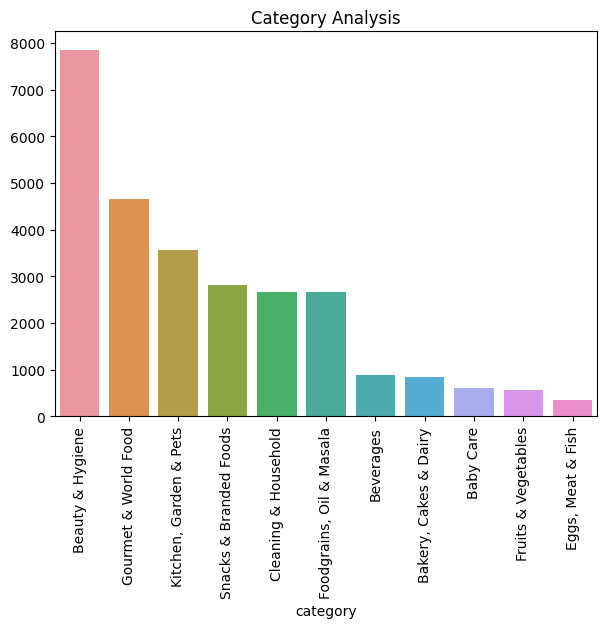

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x=category_value.index, y=category_value.values)
plt.xticks(rotation = 90)
plt.title("Category Analysis")
plt.show()

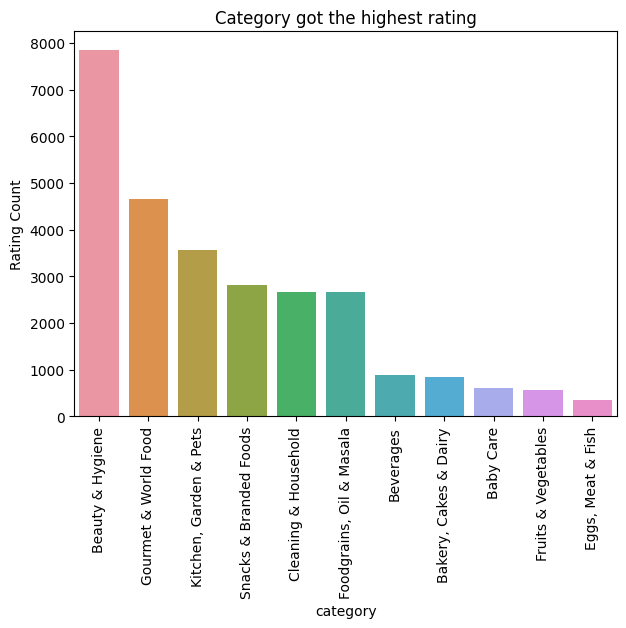

In [ ]:
x=super_data.groupby("category")["rating"].count()
y=x.sort_values(ascending=False)

plt.figure(figsize = (7,5))
sns.barplot(x=y.index, y=y.values)
plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.title("Category got the highest rating")
plt.show()

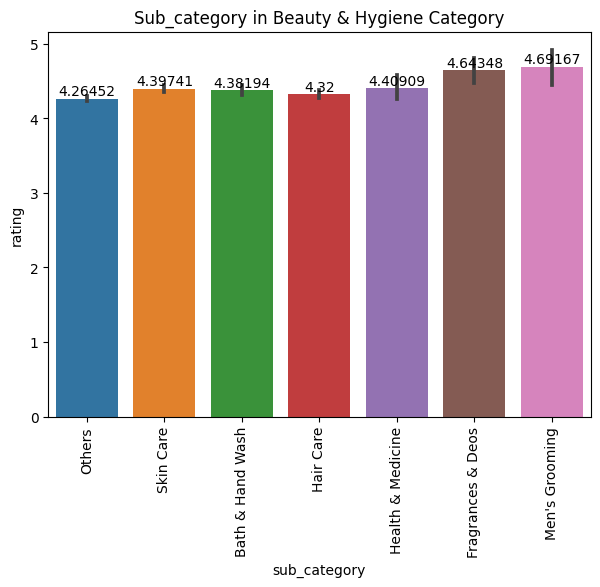

In [ ]:
filter_1 = super_data[(super_data.category == "Beauty & Hygiene") & (super_data.rating >=4 ) & (super_data.brand != "Others")]

plt.figure(figsize = (7,5))
ax=sns.barplot(data = filter_1, x="sub_category", y="rating")
plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Sub_category in Beauty & Hygiene Category")
plt.show()

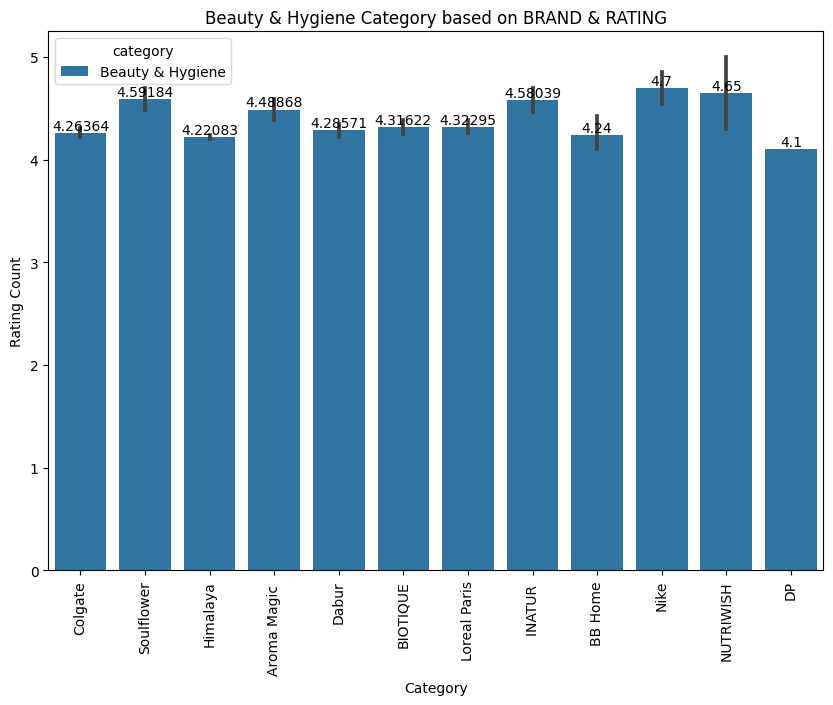

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.barplot(data = filter_1, x="brand", y="rating", hue = "category")
plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("Category")
plt.title("Beauty & Hygiene Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

### .......................................................KEY INSIGHTS.....................................................
### Top 2 Category based on highest sales and customer rating is  : 1) Beauty & Hygiene         2) Gourmet & World Food
### Under Beauty & Hygiene category- Sub-Category - Men Grooming, Fragrance & Deos got highest rating by customers.
### Under Beauty & Hygiene category- Brand "Nike" performs well as got high ratings.
### Brands like Nutriwish, Soulflower, Inature also have rating greater than 4.5.


### Visualization of Sub-Category Column

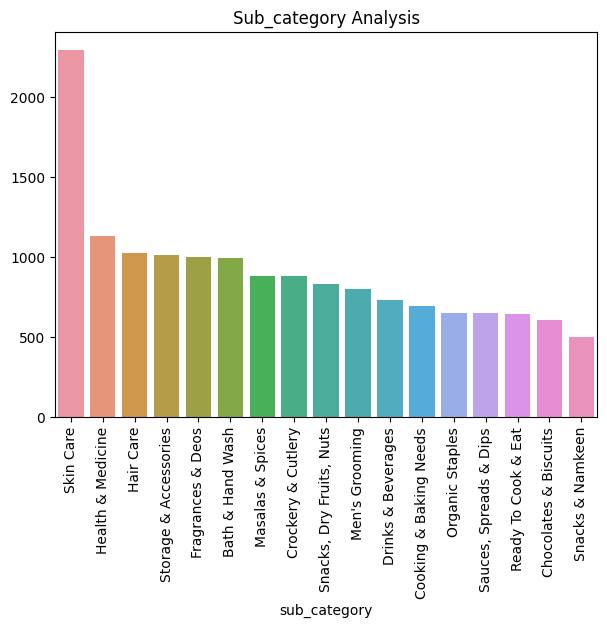

In [ ]:
pd.DataFrame(Sub_category)
plt.figure(figsize = (7,5))
sns.barplot(x=Sub_category.index, y=Sub_category.values)
plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Sub_category Analysis")
plt.show()

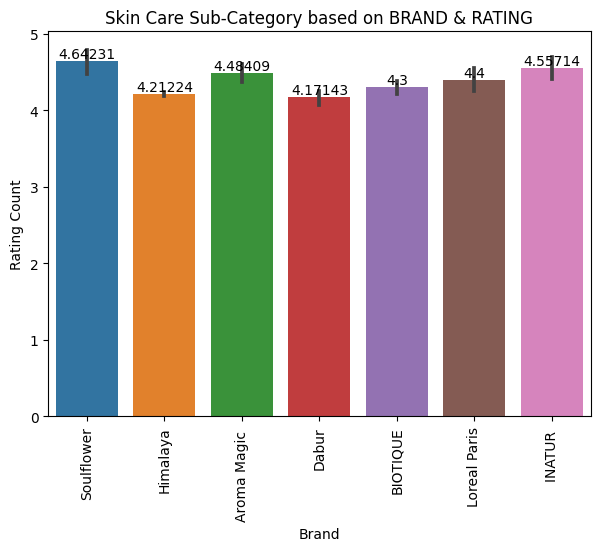

In [ ]:
filter_2 = super_data[(super_data.sub_category == "Skin Care") & (super_data.rating >=4 ) & (super_data.brand != "Others")]

plt.figure(figsize = (7,5))
ax = sns.barplot(data = filter_2, x="brand", y="rating")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("Brand")
plt.title("Skin Care Sub-Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

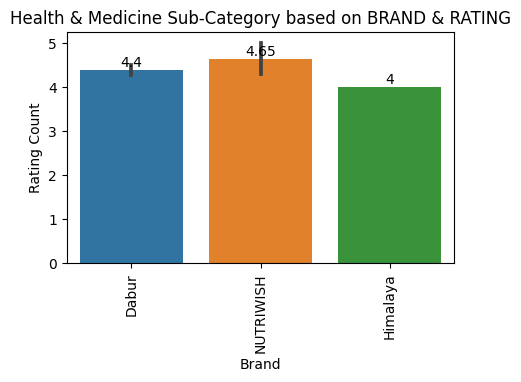

In [ ]:
filter_3 = super_data[(super_data.sub_category == "Health & Medicine") & (super_data.rating >=4 ) & (super_data.brand != "Others")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_3, x="brand", y="rating")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("Brand")
plt.title("Health & Medicine Sub-Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

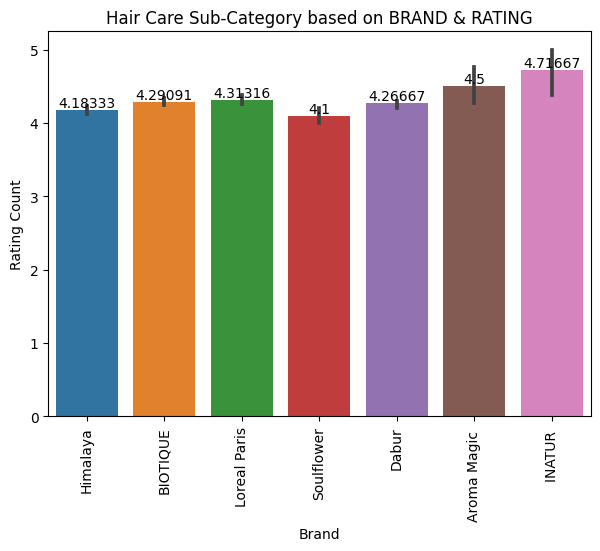

In [ ]:
filter_4 = super_data[(super_data.sub_category == "Hair Care") & (super_data.rating >=4 ) & (super_data.brand != "Others")]

plt.figure(figsize = (7,5))
ax = sns.barplot(data = filter_4, x="brand", y="rating")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("Brand")
plt.title("Hair Care Sub-Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

### ....................................................KEY INSIGHTS........................................................
### Top 3 Sub-Categories based on highest sales and rating is : 1) Skin Care   2) Health & Medicine  3) Hair Care
### Under Skin Care Sub-Category- Brand Aroma Magic, Soulflower, Inature have got highest rating by customers.
### Under Health & Medicine Sub-Category- Brand Nutriwish has highest rating.
### Under Hair Care Sub-Category- Brand Inature , Aroma Magic are highly rated by customers.

### Visualization of Product Column

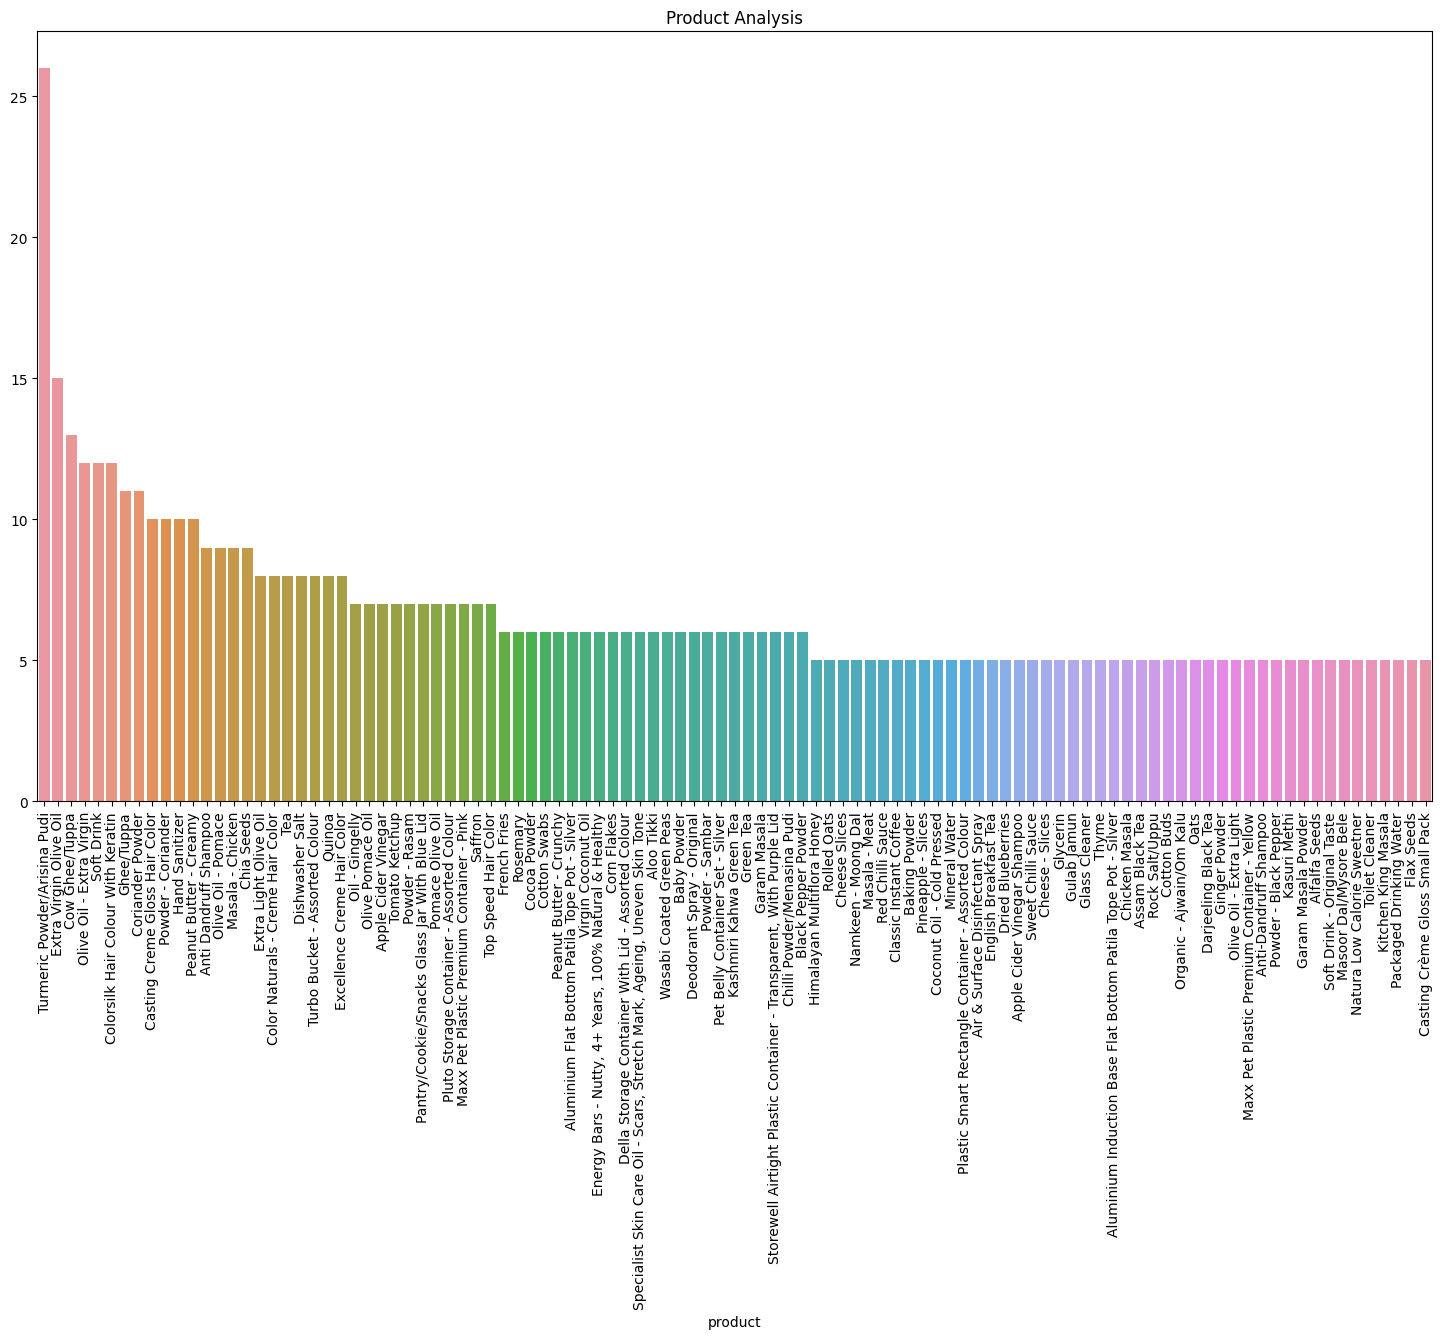

In [ ]:
pd.DataFrame(Product)
plt.figure(figsize = (18,10))
sns.barplot(x=Product.index, y=Product.values)
plt.xticks(rotation = 90)
plt.title("Product Analysis")
plt.show()

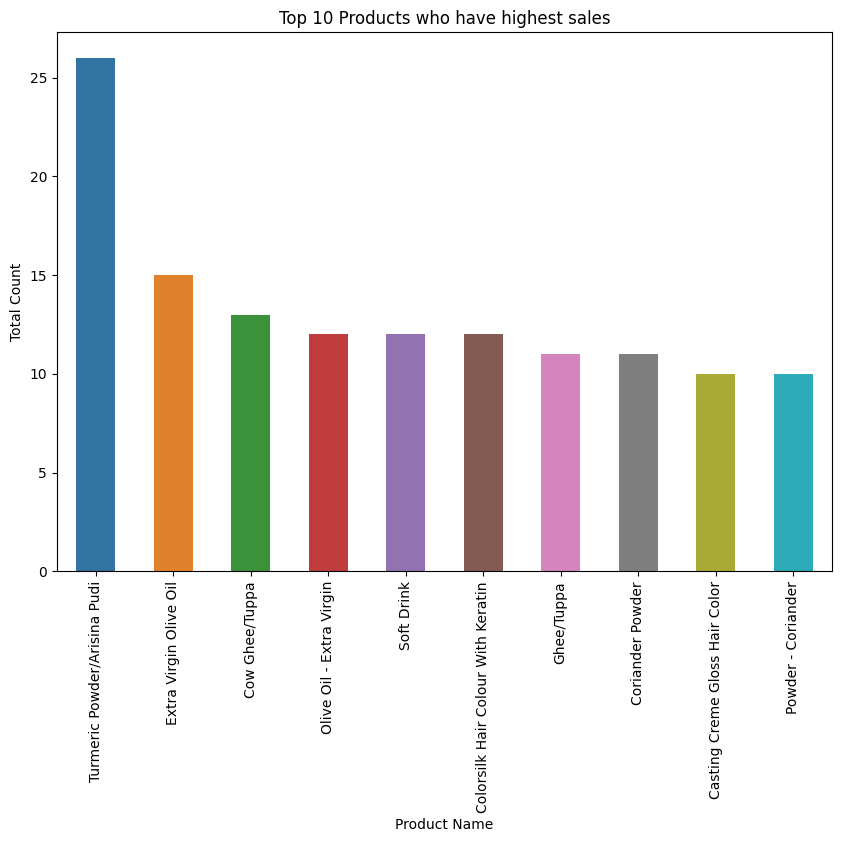

In [ ]:
k=Product.head(10)
pd.DataFrame(k)

plt.figure(figsize = (10,7))
ax=sns.barplot(x=k.index, y=k.values, width=0.5)
plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Total Count")
plt.xlabel("Product Name")
plt.title("Top 10 Products who have highest sales")
plt.show()

### ....................................................KEY INSIGHTS........................................................
### Top 2 Products based on highest sales is  : 1) Turmeric Powder/Arisina Pudi        2) Extra Virgin Olive Oil

### BRAND ANALYSIS

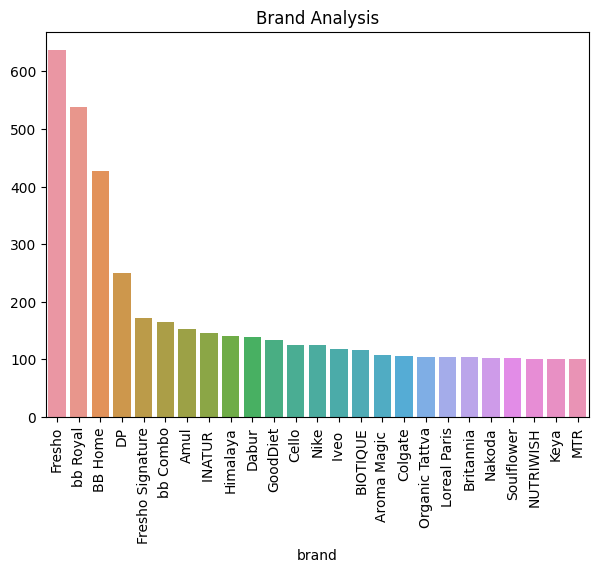

In [ ]:
pd.DataFrame(Brand)
plt.figure(figsize = (7,5))
sns.barplot(x=Brand.index, y=Brand.values)
plt.xticks(rotation = 90)
plt.title("Brand Analysis")
plt.show()

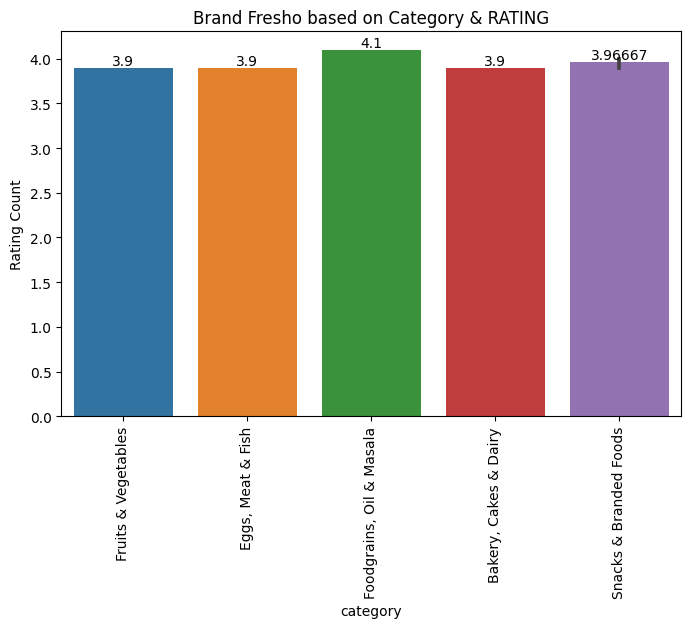

In [ ]:
filter_6 = super_data[(super_data.brand == "Fresho")]

plt.figure(figsize = (8,5))
ax = sns.barplot(data = filter_6, x="category", y="rating")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("category")
plt.title("Brand Fresho based on Category & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

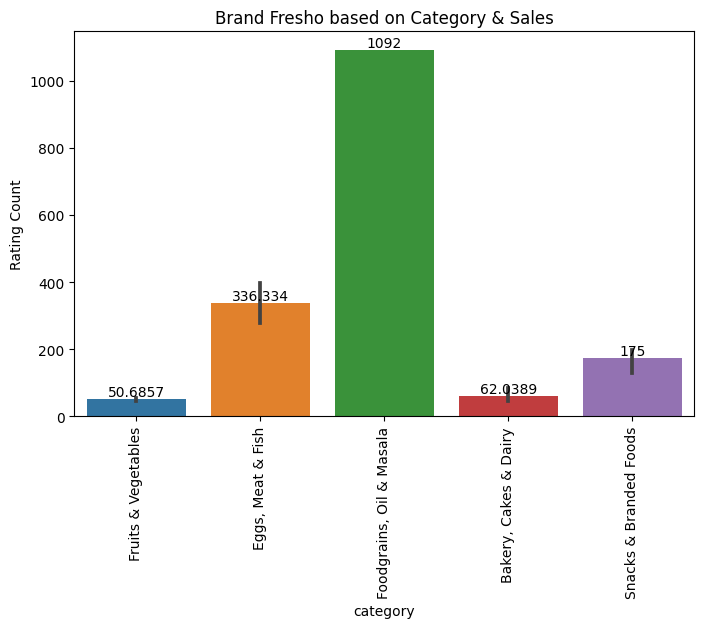

In [ ]:
filter_6 = super_data[(super_data.brand == "Fresho")]

plt.figure(figsize = (8,5))
ax = sns.barplot(data = filter_6, x="category", y="sale_price")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("category")
plt.title("Brand Fresho based on Category & Sales")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

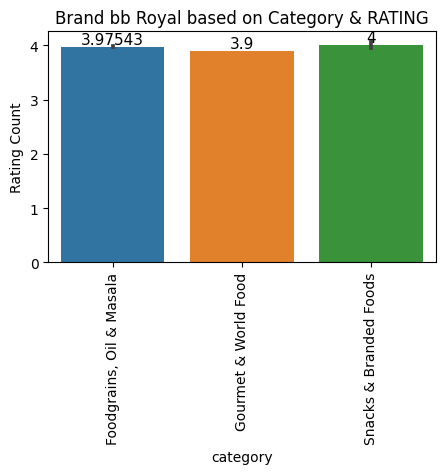

In [ ]:
filter_7 = super_data[(super_data.brand == "bb Royal")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_7, x="category", y="rating")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("category")
plt.title("Brand bb Royal based on Category & RATING")

ax.bar_label(ax.containers[0], fontsize=11)

plt.show()

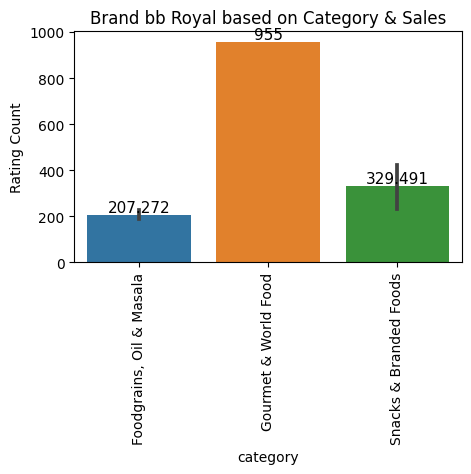

In [ ]:
filter_7 = super_data[(super_data.brand == "bb Royal")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_7, x="category", y="sale_price")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("category")
plt.title("Brand bb Royal based on Category & Sales")

ax.bar_label(ax.containers[0], fontsize=11)

plt.show()

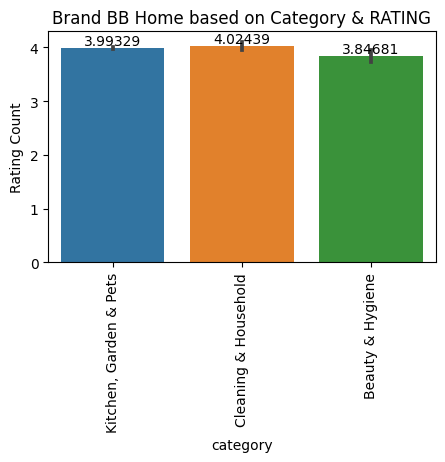

In [ ]:
filter_8 = super_data[(super_data.brand == "BB Home")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_8, x="category", y="rating")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("category")
plt.title("Brand BB Home based on Category & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

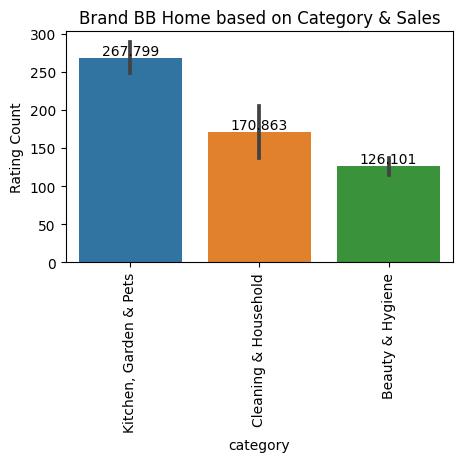

In [ ]:
filter_8 = super_data[(super_data.brand == "BB Home")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_8, x="category", y="sale_price")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("category")
plt.title("Brand BB Home based on Category & Sales")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

### ....................................................KEY INSIGHTS........................................................
### Top 3 Brands in which highest sales is done  : 1) Fresho        2) bb Royal         3) BB Home
### Under Fresho Brand- Out of 5 Category- 1) Foodgrains, Oil & Masala 2) Eggs, Meat & Fish shows highest Sales and customer rating
### Under bb Royal Brand - Out of 3 Category - Snacks & branded foods shows highest rating but sales of Gourmet & World food is highest.
### Under BB Home Brand - Out of 3 category - Kitchen, Garden & pets shows the highest rating and sales.

### Visualization of Product Type Column

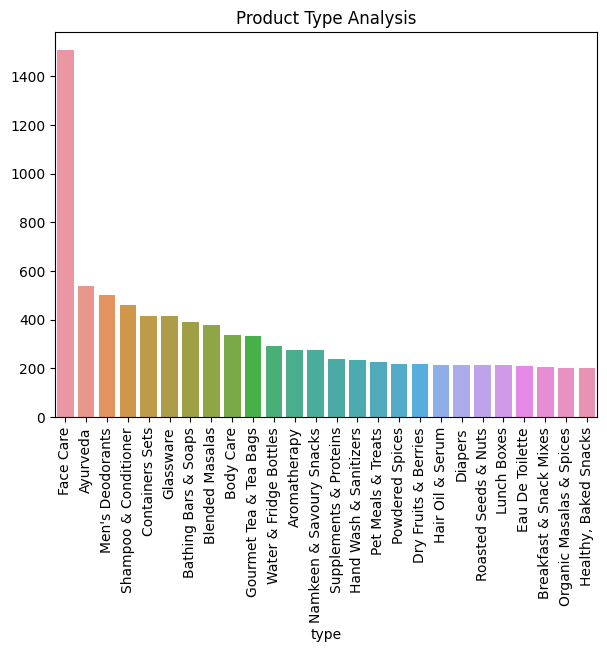

In [ ]:
pd.DataFrame(Type)
plt.figure(figsize = (7,5))
sns.barplot(x=Type.index, y=Type.values)
plt.xticks(rotation = 90)
plt.title("Product Type Analysis")
plt.show()

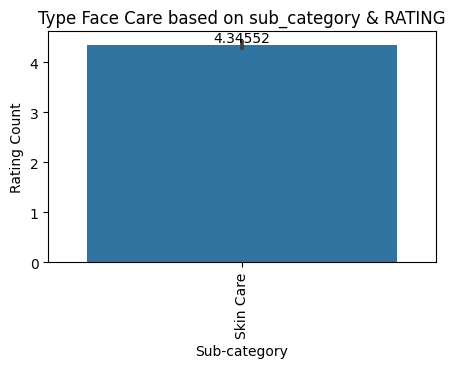

In [ ]:
filter_9 = super_data[(super_data.type == "Face Care") & (super_data.rating >= 4) & (super_data.brand != "Others")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_9, x="sub_category", y="rating")

plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Rating Count")
plt.xlabel("Sub-category")
plt.title("Type Face Care based on sub_category & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

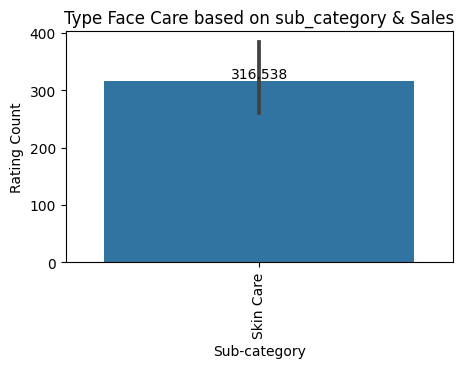

In [ ]:
plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_9, x="sub_category", y="sale_price")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Sub-category")
plt.title("Type Face Care based on sub_category & Sales")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

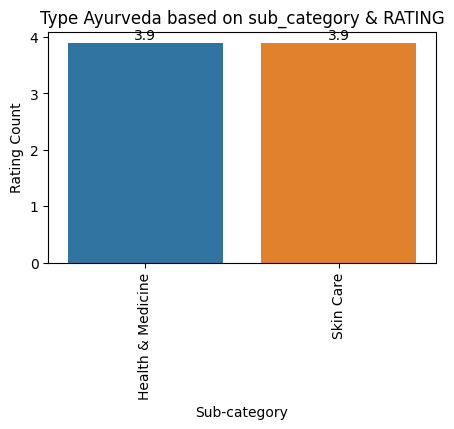

In [ ]:
filter_10 = super_data[(super_data.type == "Ayurveda")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_10, x="sub_category", y="rating")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Sub-category")
plt.title("Type Ayurveda based on sub_category & RATING")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

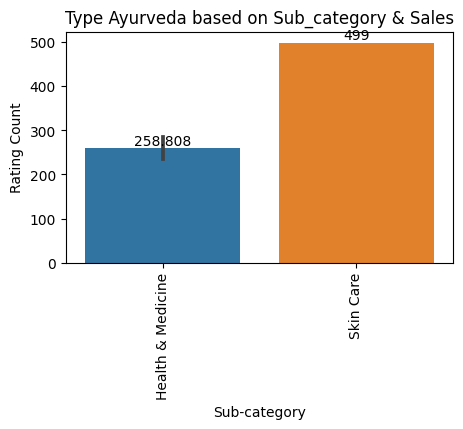

In [ ]:
filter_10 = super_data[(super_data.type == "Ayurveda")]

plt.figure(figsize = (5,3))
ax = sns.barplot(data = filter_10, x="sub_category", y="sale_price")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Sub-category")
plt.title("Type Ayurveda based on Sub_category & Sales")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

### ....................................................KEY INSIGHTS........................................................
### Top 2 Products Type in which highest sales is done  : 1) Face Care        2) Ayurveda
### Under Face Care type - Sub_category - Skin Care shows highest Sales and customer rating
### Under Ayurveda type - Both Sub_category shows good rating  but sales of Skin Care product is more.

### CUSTOMER FEEDBACK ANALYSIS

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


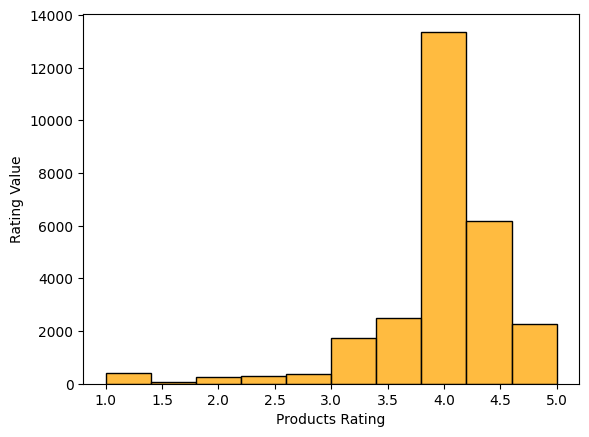

In [ ]:
sns.histplot(super_data.rating, bins =10, color="orange")
plt.xlabel("Products Rating")
plt.ylabel("Rating Value")
plt.show()

<Axes: xlabel='rating'>

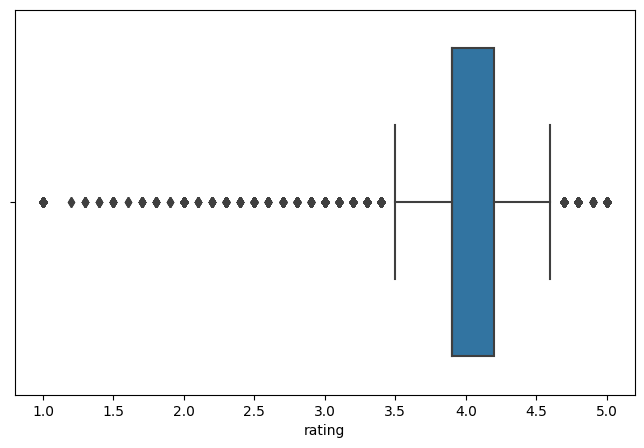

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x=super_data.rating)

### By plotting Histogram & Boxplot I can see, Highest product ratings are between 3.8 to 4.5

### Pricing Analysis

### Visualisation of Sales Price(SP), Market Price(MP), Discount(%) Column

In [ ]:
# Here, I created a new column Discount% , D% = ((MP - SP)/ MP)*100

super_data['Discount'] = ((super_data.market_price - super_data.sale_price)/super_data.market_price)*100

In [ ]:
super_data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Discount
0,1,Others,Beauty & Hygiene,Hair Care,Others,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.000000
1,2,Others,"Kitchen, Garden & Pets",Storage & Accessories,Others,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.000000
2,3,Others,Cleaning & Household,Others,Others,119.0,250.0,Others,3.4,"A perfect gift for all occasions, be it your m...",52.400000
3,4,Others,Cleaning & Household,Others,Nakoda,149.0,176.0,Others,3.7,Multipurpose container with an attractive desi...,15.340909
4,5,Others,Beauty & Hygiene,Bath & Hand Wash,Others,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


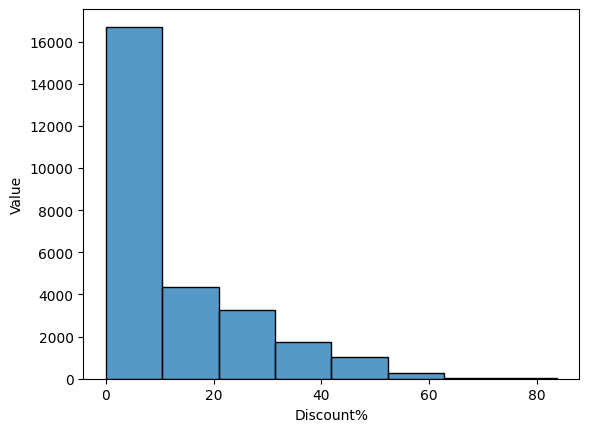

In [ ]:
sns.histplot(super_data.Discount, bins =8)

plt.xlabel("Discount%")
plt.ylabel("Value")
plt.show()

Mean of Discount:  11.833443154759566
Standard Deviation of Discount:  11.833443154759566


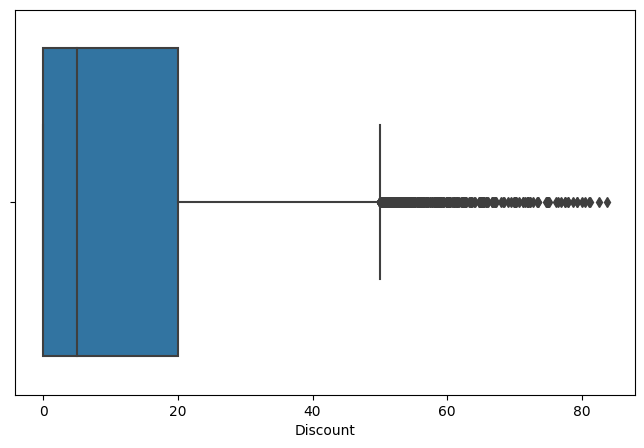

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x=super_data.Discount)
print("Mean of Discount: ", super_data.Discount.mean())
print("Standard Deviation of Discount: ", super_data.Discount.mean())

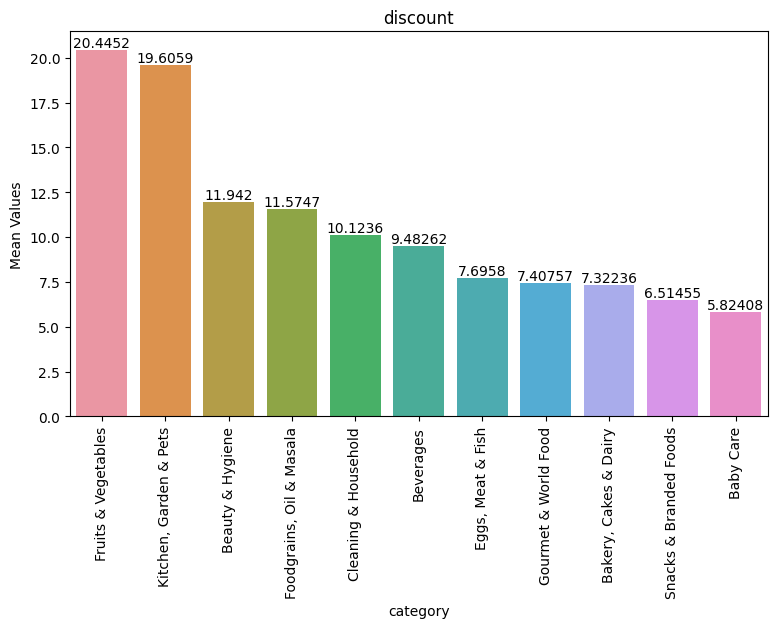

In [ ]:
dis_df =  super_data[super_data.Discount <= 50]
discount=dis_df.groupby(by = 'category')['Discount'].mean().sort_values(ascending = False)

plt.figure(figsize = (9,5))
ax= sns.barplot(x=discount.index, y=discount.values)
plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("discount")
plt.ylabel('Mean Values')
plt.show()

### .............................................Insights..............................................

### By understanding the Histogram & Boxplot as well as calculating the mean Discount% Category wise, I can say discount % ranges between 5% - 20%.
### Highest Discount (10 & above) are given to categories like Fruits & Vegetables, Kitchen, Garden & Pets, Beauty & Hygiene, Foodgrains, Oil & Masala, Cleaning & Household.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


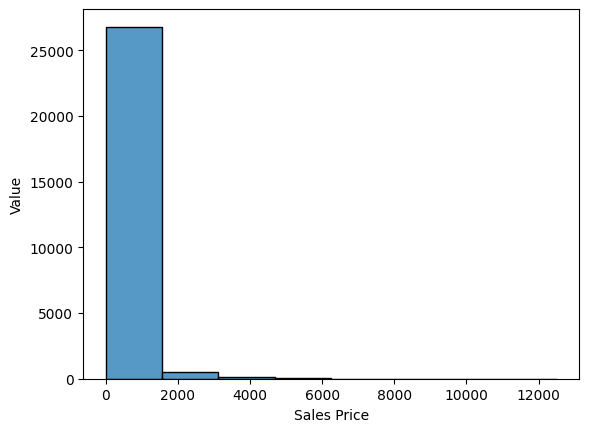

In [ ]:
sns.histplot(super_data.sale_price, bins =8)
plt.xlabel("Sales Price")
plt.ylabel("Value")
plt.show()

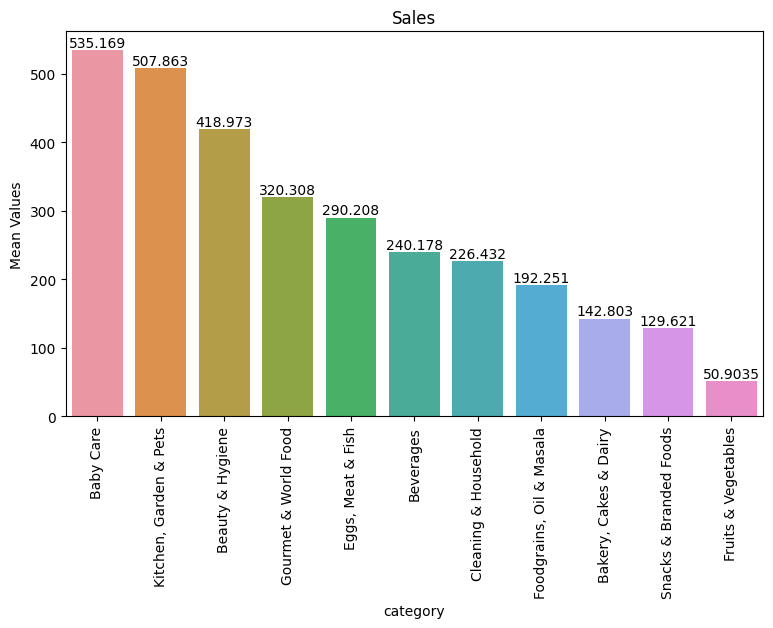

In [ ]:
sales=super_data.groupby(by = 'category')['sale_price'].mean().sort_values(ascending = False)

plt.figure(figsize = (9,5))
ax= sns.barplot(x=sales.index, y=sales.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fontsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Sales")
plt.ylabel('Mean Values')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


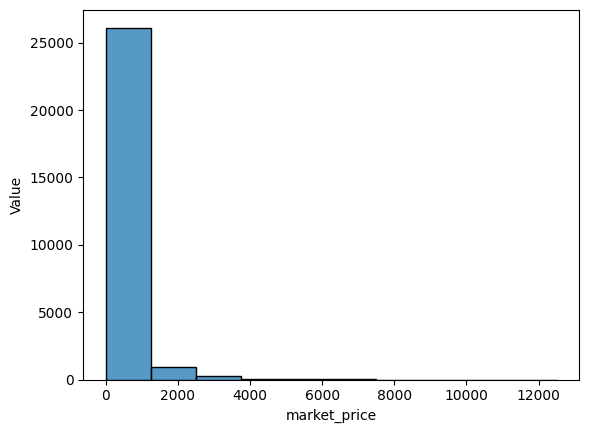

In [ ]:
sns.histplot(super_data.market_price, bins =10)
plt.xlabel("market_price")
plt.ylabel("Value")
plt.show()

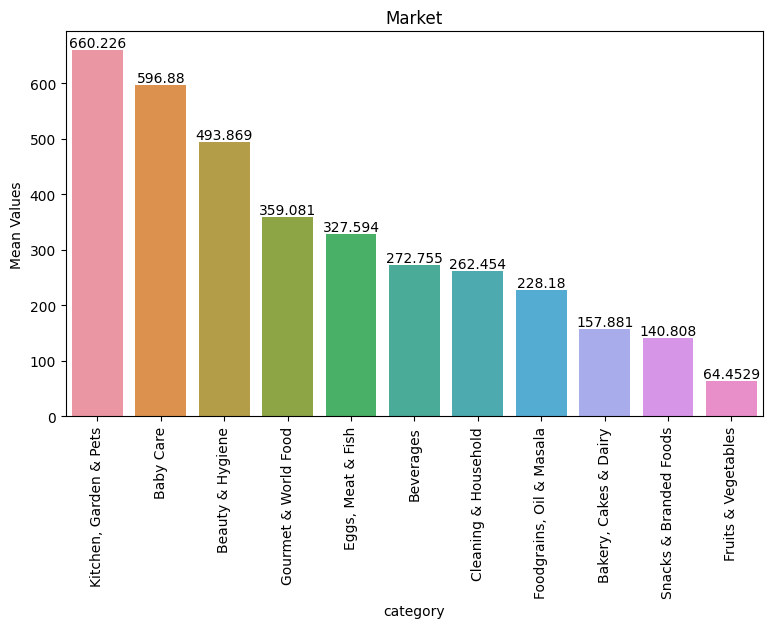

In [ ]:
market=super_data.groupby(by = 'category')['market_price'].mean().sort_values(ascending = False)

plt.figure(figsize = (9,5))
ax= sns.barplot(x=market.index, y=market.values)
plt.xticks(rotation = 90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("Market")
plt.ylabel('Mean Values')
plt.show()

### Categories like Baby Care , Kitchen, Garden & Pets, Beauty & Hygiene have high sales price & Market Price.

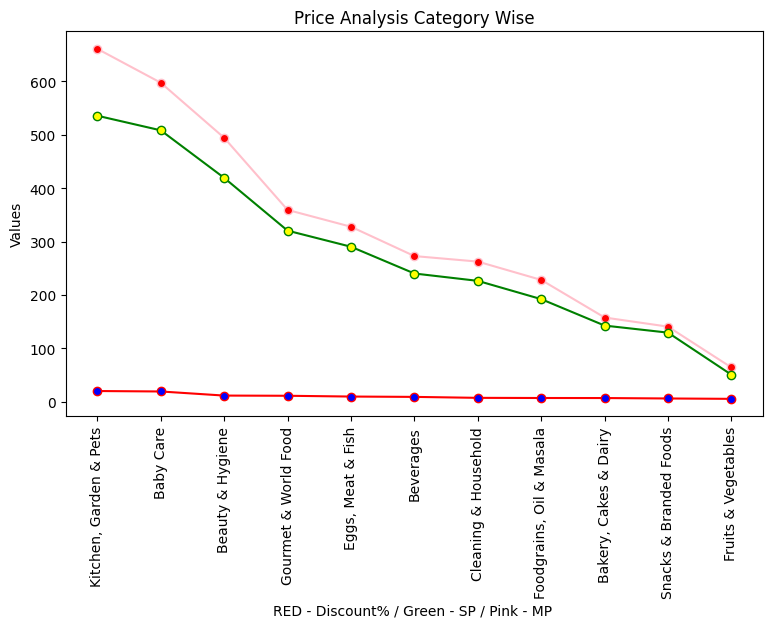

In [ ]:
plt.figure(figsize= (9,5))

plt.plot(market.index, market.values, color= 'pink', marker='o', markerfacecolor='red')

plt.plot(sales.values, color= 'green', marker='o', markerfacecolor='yellow')

plt.plot(discount.values, color= 'red', marker='o', markerfacecolor='blue')

plt.xticks(rotation = 90)
plt.title("Price Analysis Category Wise")
plt.ylabel('Values')
plt.xlabel("RED - Discount% / Green - SP / Pink - MP ")
plt.show()

### After analysing the trend of discount between different categories of product, I can say that:
### Categories like Fruits & Vegetables, Kitchen, Garden & Pets, Beauty & Hygiene have high and repeated sales because discount are high on these products.

### ................................................................. THANK YOU .........................................................................